In [21]:
import numpy as np
import pandas as pd

In [22]:
need=['水质类别', '水温', 'pH', '溶解氧', '高锰酸钾', '氨氮', '总磷', '总氮', '电导率', '浊度']

In [23]:
anshun=pd.read_excel(r"C:\Users\qiqi\Desktop\create\anshun.xlsx")
anshun=anshun[need]
anshun.dropna(axis=0, inplace=True)
anshun = anshun[anshun['水质类别'] != '-3']
anshun = anshun[anshun['水质类别'] != -3]
anshun = anshun[anshun['水质类别'] != -1]

foshan=pd.read_excel(r"C:\Users\qiqi\Desktop\create\foshan.xlsx")
foshan=foshan[need]
foshan.dropna(axis=0, inplace=True)
foshan = foshan[foshan['水质类别'] != -3]
foshan = foshan[foshan['水质类别'] != -1]

In [24]:
print(foshan["水质类别"].value_counts())
print(anshun["水质类别"].value_counts())

Ⅱ     1889
Ⅲ     1395
Ⅳ     1229
Ⅴ      190
劣Ⅴ      45
Name: 水质类别, dtype: int64
Ⅰ     2288
Ⅱ     1023
Ⅲ      134
Ⅳ       27
Ⅴ       13
劣Ⅴ       3
Name: 水质类别, dtype: int64


In [25]:
# 使用 concat() 方法合并两个 DataFrame，axis=0 表示按行拼接
merged_df = pd.concat([anshun, foshan], axis=0, ignore_index=True)
merged_df

,水质类别,水温,pH,溶解氧,高锰酸钾,氨氮,总磷,总氮,电导率,浊度
0,Ⅰ,26.3868,8.2333,8.5663,0.6718,0.0250,0.0083,2.3920,326.853,8.2973
1,Ⅰ,28.3200,8.1443,8.1520,1.0200,0.0250,0.0134,1.9360,392.960,8.3560
2,Ⅱ,23.6189,8.3559,7.2290,0.9680,0.0263,0.0125,2.9200,449.200,29.1900
3,Ⅰ,26.3312,8.2204,8.3168,0.6364,0.0250,0.0076,1.9309,327.995,8.8590
4,Ⅰ,28.0500,8.1221,7.8530,1.0400,0.0250,0.0143,1.9390,395.420,7.9740
...,...,...,...,...,...,...,...,...,...,...
8231,Ⅲ,29.3830,7.3800,5.6020,2.0730,0.1700,0.1180,2.5980,208.091,61.5330
8232,Ⅱ,29.3580,7.2900,6.5130,1.6250,0.0300,0.0530,2.0590,204.878,9.3020
8233,Ⅲ,29.3960,7.3600,5.2580,1.6360,0.2190,0.0780,1.4660,203.317,17.0390
8234,Ⅱ,29.3420,7.3500,6.5300,1.4830,0.0350,0.0530,2.0420,202.890,10.0370


In [26]:
#源域数据划分x,y
Y_yuan=merged_df["水质类别"]
Y_yuan=pd.DataFrame(Y_yuan)
X_yuan=merged_df.drop(['水质类别'], axis=1)
X_yuan

,水温,pH,溶解氧,高锰酸钾,氨氮,总磷,总氮,电导率,浊度
0,26.3868,8.2333,8.5663,0.6718,0.0250,0.0083,2.3920,326.853,8.2973
1,28.3200,8.1443,8.1520,1.0200,0.0250,0.0134,1.9360,392.960,8.3560
2,23.6189,8.3559,7.2290,0.9680,0.0263,0.0125,2.9200,449.200,29.1900
3,26.3312,8.2204,8.3168,0.6364,0.0250,0.0076,1.9309,327.995,8.8590
4,28.0500,8.1221,7.8530,1.0400,0.0250,0.0143,1.9390,395.420,7.9740
...,...,...,...,...,...,...,...,...,...
8231,29.3830,7.3800,5.6020,2.0730,0.1700,0.1180,2.5980,208.091,61.5330
8232,29.3580,7.2900,6.5130,1.6250,0.0300,0.0530,2.0590,204.878,9.3020
8233,29.3960,7.3600,5.2580,1.6360,0.2190,0.0780,1.4660,203.317,17.0390
8234,29.3420,7.3500,6.5300,1.4830,0.0350,0.0530,2.0420,202.890,10.0370


In [76]:
#目标域导入
donguang=pd.read_excel(r"C:\Users\qiqi\Desktop\《机器学习》期末综合实验\data\dg_pre.xlsx")
#donguang=donguang[need]
test_pre = donguang[donguang['水质类别'] == -3]#要预测的部分
X_pre = donguang[~(donguang['水质类别'] == -3)]#要训练的部分
X_dg=X_pre.drop(['水质类别'], axis=1)
Y_dg=X_pre['水质类别']
Y_dg=pd.DataFrame(Y_dg)

In [80]:
test_pre.to_excel("./0001.xlsx")

In [49]:
Y_dg.value_counts()

水质类别
3       3570
1       2495
2       1739
4        944
5        655
dtype: int64

In [50]:
Y_yuan.value_counts()

水质类别
1       2912
0       2288
2       1529
3       1256
4        203
5         48
dtype: int64

In [29]:
#编码
from sklearn.preprocessing import LabelEncoder

# 创建 LabelEncoder 对象
le = LabelEncoder()

# 对 Y_yuan 中的 '水质类别' 进行编码
le.fit(Y_yuan["水质类别"])
Y_encoded = le.transform(Y_yuan["水质类别"])
Y_yuan["水质类别"]= le.transform(Y_yuan["水质类别"])
# 将编码应用到 X_dongguan 的 '水质类别' 列
Y_dg['水质类别'] = le.transform(Y_dg['水质类别'])

## 标准化——源域数据

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
yuan_train_scaled = scaler.fit_transform(X_yuan)

In [32]:
from sklearn.model_selection import train_test_split
X_train_yuan, X_test_yuan, y_train_yuan, y_test_yuan = train_test_split(yuan_train_scaled, Y_yuan, test_size=0.2, random_state=42)

In [33]:
y_train_yuan=np.array(y_train_yuan).flatten()
y_test_yuan=np.array(y_test_yuan).flatten()

## 标准化——训练集

In [34]:
#划分
#划分数据集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dg, Y_dg['水质类别'], test_size=0.2, random_state=42)

In [35]:
#标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
#一需要预测的标准化
test_pre_scaled=scaler.transform(test_pre[need].drop(columns="水质类别"))

In [42]:
y_train=np.array(y_train).flatten()
y_test=np.array(y_test).flatten()

## 建模

In [53]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd

# 加载数据集
# 创建一个TensorDataset----源域数据 X_train_yuan, X_test_yuan, y_train_yuan, y_test_yuan
# 转换数据集
X_train_tensor = torch.tensor(X_train_yuan).float()
y_train_tensor = torch.tensor(y_train_yuan)
X_test_tensor = torch.tensor(X_test_yuan).float()
y_test_tensor = torch.tensor(y_test_yuan)

# 创建TensorDataset对象
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

# 创建DataLoader对象
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)





#训练域数据集X_train_scaled    X_test_scaled    y_train  y_test
import torch
from torch.utils.data import TensorDataset, DataLoader

# 转换数据集
X_train_tensor = torch.tensor(X_train_scaled).float()
y_train_tensor = torch.tensor(y_train)
X_test_tensor = torch.tensor(X_test_scaled).float()
y_test_tensor = torch.tensor(y_test)

# 创建TensorDataset对象
X_data = TensorDataset(X_train_tensor, y_train_tensor)
Y_data = TensorDataset(X_test_tensor, y_test_tensor)

# 创建DataLoader对象
X_loader = DataLoader(X_data, batch_size=32, shuffle=True)
Y_loader = DataLoader(Y_data, batch_size=32, shuffle=True)

# 定义 ANN 模型
class ANN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(p=0.2)  # 添加dropout层
        self.relu = nn.ReLU()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        self.dropout = nn.Dropout(p=0.2)  # 添加dropout层
        out = self.fc2(out)
        return out

# 定义训练函数
def train(model, criterion, optimizer, train_loader):
    model.train()
    train_loss = 0
    train_acc = 0
    for x, y in train_loader:
        x = x.float()
        y = y.long()
        
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, pred = torch.max(output, 1)
        train_acc += torch.sum(pred == y.data)
        
    return train_loss/len(train_loader), train_acc/len(train_loader.dataset)

# 定义测试函数
def test(model, criterion, test_loader):
    model.eval()
    test_loss = 0
    test_acc = 0
    with torch.no_grad():
        for x, y in test_loader:
            x = x.float()
            y = y.long()
            
            output = model(x)
            loss = criterion(output, y)
            
            test_loss += loss.item()
            _, pred = torch.max(output, 1)
            test_acc += torch.sum(pred == y.data)
            
    return test_loss/len(test_loader), test_acc/len(test_loader.dataset)

# 训练预设模型
input_dim = 9
hidden_dim = 128
output_dim = 6

model = ANN(input_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

for epoch in range(300):
    train_loss, train_acc = train(model, criterion, optimizer, train_loader)
    test_loss, test_acc = test(model, criterion, test_loader)

    print(f'Epoch {epoch+1}: Train Loss={train_loss:.4f}, Train Acc={train_acc:.4f}, Test Loss={test_loss:.4f}, Test Acc={test_acc:.4f}')

# 冻结某一层参数进行迁移学习
model.fc1.requires_grad = False

# 定义新分类器
new_fc = nn.Sequential(
    nn.Linear(hidden_dim, 128),
    nn.ReLU(),
    nn.Linear(128, output_dim),
)

# 定义新模型
model.fc2 = new_fc

# 定义迁移学习的训练函数
def transfer_train(model, criterion, optimizer, train_loader):
    maxnow=0
    model.train()
    train_loss = 0
    train_acc = 0
    for x, y in train_loader:
        x = x.float()
        y = y.long()
        
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, pred = torch.max(output, 1)
        train_acc += torch.sum(pred == y.data)
        if train_acc/len(train_loader.dataset) >maxnow:
            maxnow=train_acc/len(train_loader.dataset)
            # 将模型保存在本地
            torch.save(model.state_dict(), f'model_{epoch+1}.pt')
    return train_loss/len(train_loader), train_acc/len(train_loader.dataset)

# 定义迁移学习的测试函数
def transfer_test(model, criterion, test_loader):
    model.eval()
    test_loss = 0
    test_acc = 0
    with torch.no_grad():
        for x, y in test_loader:
            x= x.float()
            y = y.long()
            output = model(x)
            loss = criterion(output, y)
            test_loss += loss.item()
            _, pred = torch.max(output, 1)
            test_acc += torch.sum(pred == y.data)
    return test_loss/len(test_loader), test_acc/len(test_loader.dataset)

Epoch 1: Train Loss=0.9573, Train Acc=0.6604, Test Loss=0.6357, Test Acc=0.7688
Epoch 2: Train Loss=0.5777, Train Acc=0.7961, Test Loss=0.4871, Test Acc=0.8410
Epoch 3: Train Loss=0.4673, Train Acc=0.8367, Test Loss=0.4107, Test Acc=0.8610
Epoch 4: Train Loss=0.4008, Train Acc=0.8666, Test Loss=0.3558, Test Acc=0.8902
Epoch 5: Train Loss=0.3545, Train Acc=0.8866, Test Loss=0.3155, Test Acc=0.9035
Epoch 6: Train Loss=0.3156, Train Acc=0.8998, Test Loss=0.2875, Test Acc=0.9144
Epoch 7: Train Loss=0.2852, Train Acc=0.9111, Test Loss=0.2632, Test Acc=0.9254
Epoch 8: Train Loss=0.2601, Train Acc=0.9209, Test Loss=0.2503, Test Acc=0.9260
Epoch 9: Train Loss=0.2393, Train Acc=0.9261, Test Loss=0.2248, Test Acc=0.9357
Epoch 10: Train Loss=0.2208, Train Acc=0.9329, Test Loss=0.2107, Test Acc=0.9448
Epoch 11: Train Loss=0.2061, Train Acc=0.9362, Test Loss=0.2023, Test Acc=0.9411
Epoch 12: Train Loss=0.1919, Train Acc=0.9438, Test Loss=0.1887, Test Acc=0.9496
Epoch 13: Train Loss=0.1810, Train Ac

Epoch 103: Train Loss=0.0503, Train Acc=0.9854, Test Loss=0.0918, Test Acc=0.9709
Epoch 104: Train Loss=0.0500, Train Acc=0.9853, Test Loss=0.0879, Test Acc=0.9751
Epoch 105: Train Loss=0.0505, Train Acc=0.9845, Test Loss=0.0838, Test Acc=0.9782
Epoch 106: Train Loss=0.0486, Train Acc=0.9874, Test Loss=0.0859, Test Acc=0.9800
Epoch 107: Train Loss=0.0484, Train Acc=0.9865, Test Loss=0.0921, Test Acc=0.9703
Epoch 108: Train Loss=0.0481, Train Acc=0.9851, Test Loss=0.0887, Test Acc=0.9733
Epoch 109: Train Loss=0.0493, Train Acc=0.9847, Test Loss=0.0885, Test Acc=0.9745
Epoch 110: Train Loss=0.0482, Train Acc=0.9857, Test Loss=0.0853, Test Acc=0.9769
Epoch 111: Train Loss=0.0491, Train Acc=0.9842, Test Loss=0.0916, Test Acc=0.9733
Epoch 112: Train Loss=0.0479, Train Acc=0.9850, Test Loss=0.0897, Test Acc=0.9733
Epoch 113: Train Loss=0.0473, Train Acc=0.9859, Test Loss=0.0941, Test Acc=0.9745
Epoch 114: Train Loss=0.0464, Train Acc=0.9866, Test Loss=0.0869, Test Acc=0.9775
Epoch 115: Train

Epoch 203: Train Loss=0.0339, Train Acc=0.9904, Test Loss=0.0868, Test Acc=0.9751
Epoch 204: Train Loss=0.0341, Train Acc=0.9913, Test Loss=0.0816, Test Acc=0.9794
Epoch 205: Train Loss=0.0326, Train Acc=0.9907, Test Loss=0.0884, Test Acc=0.9751
Epoch 206: Train Loss=0.0338, Train Acc=0.9910, Test Loss=0.0882, Test Acc=0.9775
Epoch 207: Train Loss=0.0347, Train Acc=0.9894, Test Loss=0.0844, Test Acc=0.9788
Epoch 208: Train Loss=0.0328, Train Acc=0.9906, Test Loss=0.0902, Test Acc=0.9715
Epoch 209: Train Loss=0.0326, Train Acc=0.9910, Test Loss=0.0804, Test Acc=0.9812
Epoch 210: Train Loss=0.0320, Train Acc=0.9918, Test Loss=0.0827, Test Acc=0.9763
Epoch 211: Train Loss=0.0332, Train Acc=0.9918, Test Loss=0.0880, Test Acc=0.9751
Epoch 212: Train Loss=0.0343, Train Acc=0.9900, Test Loss=0.0803, Test Acc=0.9782
Epoch 213: Train Loss=0.0331, Train Acc=0.9910, Test Loss=0.0880, Test Acc=0.9727
Epoch 214: Train Loss=0.0343, Train Acc=0.9895, Test Loss=0.0935, Test Acc=0.9733
Epoch 215: Train

In [54]:
optimizer = optim.Adam(model.fc2.parameters())
maxscore=0
for epoch in range(300):
    train_loss, train_acc = transfer_train(model, criterion, optimizer, X_loader)
    test_loss, test_acc = transfer_test(model, criterion, Y_loader)
    print(f'Epoch {epoch+1}: Train Loss={train_loss:.4f}, Train Acc={train_acc:.4f}, Test Loss={test_loss:.4f}, Test Acc={test_acc:.4f}')

Epoch 1: Train Loss=0.5778, Train Acc=0.7684, Test Loss=0.4799, Test Acc=0.7953
Epoch 2: Train Loss=0.4694, Train Acc=0.8016, Test Loss=0.4510, Test Acc=0.8113
Epoch 3: Train Loss=0.4646, Train Acc=0.8131, Test Loss=0.4454, Test Acc=0.8155
Epoch 4: Train Loss=0.4456, Train Acc=0.8143, Test Loss=0.4557, Test Acc=0.7937
Epoch 5: Train Loss=0.4340, Train Acc=0.8231, Test Loss=0.4395, Test Acc=0.8113
Epoch 6: Train Loss=0.4307, Train Acc=0.8217, Test Loss=0.4350, Test Acc=0.8187
Epoch 7: Train Loss=0.4326, Train Acc=0.8173, Test Loss=0.4313, Test Acc=0.8155
Epoch 8: Train Loss=0.4204, Train Acc=0.8277, Test Loss=0.4581, Test Acc=0.7964
Epoch 9: Train Loss=0.4155, Train Acc=0.8249, Test Loss=0.4310, Test Acc=0.8139
Epoch 10: Train Loss=0.4102, Train Acc=0.8328, Test Loss=0.4303, Test Acc=0.8123
Epoch 11: Train Loss=0.4110, Train Acc=0.8320, Test Loss=0.4377, Test Acc=0.8171
Epoch 12: Train Loss=0.4061, Train Acc=0.8349, Test Loss=0.4253, Test Acc=0.8166
Epoch 13: Train Loss=0.4100, Train Ac

Epoch 103: Train Loss=0.3244, Train Acc=0.8609, Test Loss=0.4221, Test Acc=0.8246
Epoch 104: Train Loss=0.3318, Train Acc=0.8550, Test Loss=0.4180, Test Acc=0.8331
Epoch 105: Train Loss=0.3256, Train Acc=0.8564, Test Loss=0.4133, Test Acc=0.8235
Epoch 106: Train Loss=0.3225, Train Acc=0.8591, Test Loss=0.4128, Test Acc=0.8299
Epoch 107: Train Loss=0.3219, Train Acc=0.8596, Test Loss=0.4209, Test Acc=0.8278
Epoch 108: Train Loss=0.3224, Train Acc=0.8570, Test Loss=0.4358, Test Acc=0.8224
Epoch 109: Train Loss=0.3236, Train Acc=0.8584, Test Loss=0.4213, Test Acc=0.8235
Epoch 110: Train Loss=0.3258, Train Acc=0.8604, Test Loss=0.4173, Test Acc=0.8240
Epoch 111: Train Loss=0.3289, Train Acc=0.8552, Test Loss=0.4100, Test Acc=0.8256
Epoch 112: Train Loss=0.3223, Train Acc=0.8576, Test Loss=0.4186, Test Acc=0.8315
Epoch 113: Train Loss=0.3209, Train Acc=0.8600, Test Loss=0.4246, Test Acc=0.8230
Epoch 114: Train Loss=0.3206, Train Acc=0.8612, Test Loss=0.4204, Test Acc=0.8272
Epoch 115: Train

Epoch 203: Train Loss=0.2914, Train Acc=0.8692, Test Loss=0.4385, Test Acc=0.8309
Epoch 204: Train Loss=0.2921, Train Acc=0.8737, Test Loss=0.4709, Test Acc=0.8224
Epoch 205: Train Loss=0.2895, Train Acc=0.8718, Test Loss=0.4279, Test Acc=0.8278
Epoch 206: Train Loss=0.2956, Train Acc=0.8700, Test Loss=0.4388, Test Acc=0.8320
Epoch 207: Train Loss=0.2959, Train Acc=0.8729, Test Loss=0.4255, Test Acc=0.8288
Epoch 208: Train Loss=0.2894, Train Acc=0.8757, Test Loss=0.4334, Test Acc=0.8299
Epoch 209: Train Loss=0.2904, Train Acc=0.8734, Test Loss=0.4366, Test Acc=0.8325
Epoch 210: Train Loss=0.2890, Train Acc=0.8710, Test Loss=0.4423, Test Acc=0.8214
Epoch 211: Train Loss=0.2890, Train Acc=0.8726, Test Loss=0.4267, Test Acc=0.8283
Epoch 212: Train Loss=0.2871, Train Acc=0.8733, Test Loss=0.4284, Test Acc=0.8331
Epoch 213: Train Loss=0.2950, Train Acc=0.8680, Test Loss=0.4214, Test Acc=0.8283
Epoch 214: Train Loss=0.3018, Train Acc=0.8639, Test Loss=0.4407, Test Acc=0.8283
Epoch 215: Train

In [55]:
# 转换特征为张量
X_test_tensor = torch.tensor(test_pre_scaled).float()
X_test_tensor

tensor([[ 3.5858e-01,  8.5178e-01,  4.3617e-01,  7.2171e-01,  1.0126e-01,
          8.3672e-01,  1.2148e+00, -3.0863e-01,  2.2289e-02],
        [ 3.4595e-01,  8.7191e-01,  4.4788e-01,  7.6994e-01,  1.0724e-01,
          8.3032e-01,  1.1984e+00, -3.0898e-01,  1.8703e-02],
        [ 8.5793e-02,  3.1770e-01, -8.5531e-01,  2.9468e+00,  2.5781e+00,
          2.4765e+00,  1.0551e+00, -3.5510e-01,  8.9063e+00],
        [ 7.3547e-02,  2.6382e-01, -9.3272e-01,  3.0018e+00,  2.7131e+00,
          2.6162e+00,  1.0187e+00, -3.5873e-01,  9.1100e+00],
        [ 5.8696e-02,  2.0079e-01, -1.0854e+00,  3.2089e+00,  2.8200e+00,
          3.1482e+00,  9.5998e-01, -3.6394e-01,  1.0364e+01],
        [ 4.2933e-02,  1.2252e-01, -1.1946e+00,  3.2762e+00,  2.9126e+00,
          3.3921e+00,  9.7273e-01, -3.6899e-01,  1.0866e+01],
        [-1.4909e-01,  1.1474e-03, -3.8146e-01,  9.5973e-01,  2.9001e+00,
          1.9579e+00,  5.8790e-01, -3.4950e-01,  1.0897e-01],
        [ 1.2697e+00,  5.3804e-02,  1.6179e-01, 

In [56]:
output = model(X_test_tensor)
_, pred = torch.max(output, 1)
pred

tensor([3, 2, 5, 5, 5, 5, 5, 3, 4, 4, 4, 4, 4, 4, 5, 3, 3, 3, 5, 3, 3, 3, 3, 3,
        3, 3, 5, 5, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 5, 5, 5, 3, 3, 4, 4, 4, 3, 3, 3, 5, 2, 2, 2, 2, 1, 1, 1, 3,
        3, 3, 4, 4, 4, 4, 3, 3, 3, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 1,
        1, 1, 1, 1, 1])

In [57]:
y_pred_numpy = pred.numpy()
df_pred = pd.DataFrame(y_pred_numpy, columns=['水质类别'])

In [58]:
df_pred.value_counts()

水质类别
3       51
1       14
4       13
5       13
2       10
dtype: int64

In [81]:
#test_pre.to_excel("./0001.xlsx")
df_pred.to_excel("./0001-1.xlsx")
X_pre.to_excel("./0002.xlsx")

In [82]:
data=pd.read_excel("./0001.xlsx")

In [83]:
X_pre

,index,河流,断面名称,水质类别,水温,pH,溶解氧,高锰酸钾,氨氮,总磷,总氮,电导率,浊度
0,2022-05-01 00:00:00,石马河,旗岭,Ⅳ,25.486667,7.181111,5.683778,4.951111,0.969489,0.304244,10.074111,620.846111,133.282222
1,2022-05-01 04:00:00,石马河,旗岭,Ⅳ,25.134000,7.161900,5.533700,5.266300,1.214510,0.344120,10.387200,595.320700,167.819000
2,2022-05-01 08:00:00,石马河,旗岭,Ⅳ,24.852727,7.154000,5.593455,5.289091,1.387682,0.343900,10.244455,573.663091,159.409091
3,2022-05-01 12:00:00,石马河,旗岭,Ⅳ,24.608333,7.141417,5.482333,5.308083,1.521142,0.372458,10.125500,553.939583,195.994167
4,2022-05-01 16:00:00,石马河,旗岭,Ⅳ,24.401538,7.130769,5.388308,5.324154,1.634069,0.396623,10.024846,537.250462,226.950769
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9499,2023-05-31 04:00:00,东江南支流,石龙南河,Ⅳ,29.248571,6.670786,5.202214,2.227429,0.063393,0.068357,2.367786,199.022857,13.691571
9500,2023-05-31 08:00:00,东江南支流,石龙南河,Ⅲ,29.257692,6.668385,5.161692,2.233154,0.056531,0.068323,2.366692,198.790615,13.844231
9501,2023-05-31 12:00:00,东江南支流,石龙南河,Ⅲ,29.268333,6.663333,5.137583,2.169833,0.050633,0.064283,2.340417,198.548167,12.724667
9502,2023-05-31 16:00:00,东江南支流,石龙南河,Ⅲ,29.302727,6.661818,5.136909,2.164182,0.043764,0.063900,2.335273,198.242182,12.834455


In [84]:
data

,index,河流,断面名称,水质类别,水温,pH,溶解氧,高锰酸钾,氨氮,总磷,总氮,电导率,浊度
0,2022-05-08 08:00:00,石马河,旗岭,3,26.767778,7.235833,6.535167,3.921778,0.560683,0.198339,9.195722,635.311444,46.984444
1,2022-05-08 12:00:00,石马河,旗岭,2,26.713889,7.241333,6.559111,3.973444,0.564111,0.197789,9.143111,633.859278,46.803333
2,2022-05-12 12:00:00,石马河,旗岭,5,25.604444,7.089889,3.894611,6.305056,1.982378,0.339272,8.685000,443.512389,495.572778
3,2022-05-12 16:00:00,石马河,旗岭,5,25.552222,7.075167,3.736333,6.364000,2.059850,0.351283,8.568778,428.513722,505.857222
4,2022-05-12 20:00:00,石马河,旗岭,5,25.488889,7.057944,3.424167,6.585833,2.121211,0.397006,8.380889,407.011722,569.171111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2022-10-25 12:00:00,东江南支流,石龙南河,1,26.880000,7.425556,7.476056,1.379556,0.025889,0.044344,1.926500,191.866667,19.070556
97,2022-12-19 08:00:00,东江南支流,石龙南河,1,17.282222,7.152222,8.516278,1.285000,0.025750,0.055922,2.060556,164.649500,11.217556
98,2022-12-19 12:00:00,东江南支流,石龙南河,1,17.247222,7.155000,8.541111,1.283944,0.025839,0.056244,2.052667,164.559667,11.157333
99,2022-12-19 16:00:00,东江南支流,石龙南河,1,17.220556,7.157222,8.567556,1.285500,0.025839,0.056272,2.048667,164.535833,11.242556


In [85]:
dong=pd.concat([data,X_pre])

In [86]:
dong

,index,河流,断面名称,水质类别,水温,pH,溶解氧,高锰酸钾,氨氮,总磷,总氮,电导率,浊度
0,2022-05-08 08:00:00,石马河,旗岭,3,26.767778,7.235833,6.535167,3.921778,0.560683,0.198339,9.195722,635.311444,46.984444
1,2022-05-08 12:00:00,石马河,旗岭,2,26.713889,7.241333,6.559111,3.973444,0.564111,0.197789,9.143111,633.859278,46.803333
2,2022-05-12 12:00:00,石马河,旗岭,5,25.604444,7.089889,3.894611,6.305056,1.982378,0.339272,8.685000,443.512389,495.572778
3,2022-05-12 16:00:00,石马河,旗岭,5,25.552222,7.075167,3.736333,6.364000,2.059850,0.351283,8.568778,428.513722,505.857222
4,2022-05-12 20:00:00,石马河,旗岭,5,25.488889,7.057944,3.424167,6.585833,2.121211,0.397006,8.380889,407.011722,569.171111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9499,2023-05-31 04:00:00,东江南支流,石龙南河,Ⅳ,29.248571,6.670786,5.202214,2.227429,0.063393,0.068357,2.367786,199.022857,13.691571
9500,2023-05-31 08:00:00,东江南支流,石龙南河,Ⅲ,29.257692,6.668385,5.161692,2.233154,0.056531,0.068323,2.366692,198.790615,13.844231
9501,2023-05-31 12:00:00,东江南支流,石龙南河,Ⅲ,29.268333,6.663333,5.137583,2.169833,0.050633,0.064283,2.340417,198.548167,12.724667
9502,2023-05-31 16:00:00,东江南支流,石龙南河,Ⅲ,29.302727,6.661818,5.136909,2.164182,0.043764,0.063900,2.335273,198.242182,12.834455


In [87]:
dong.replace({'水质类别': {1: 'Ⅰ', 2: 'Ⅱ', 3: 'Ⅲ', 4: 'Ⅳ', 5: 'Ⅴ', 6: '劣Ⅴ'}}, inplace=True)

In [88]:
dong["水质类别"].value_counts()

Ⅳ     3583
Ⅱ     2505
Ⅲ     1790
Ⅴ      957
劣Ⅴ     655
Ⅰ       14
Name: 水质类别, dtype: int64

In [89]:
dong.to_excel("./DongGuang.xlsx")

In [90]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

In [92]:
dong_dgyh=dong[dong["河流"]=="东莞运河"]

In [93]:
dong_dgyh

,index,河流,断面名称,水质类别,水温,pH,溶解氧,高锰酸钾,氨氮,总磷,总氮,电导率,浊度
52,2022-05-13 16:00:00,东莞运河,樟村(家乐福),Ⅴ,26.032222,7.006333,1.883500,5.746333,1.550150,0.153933,5.814778,386.856944,35.746667
53,2022-05-13 20:00:00,东莞运河,樟村(家乐福),Ⅴ,25.988889,7.012556,1.767056,5.789389,1.636406,0.155656,5.726500,377.253944,36.438333
54,2022-05-14 00:00:00,东莞运河,樟村(家乐福),Ⅴ,25.935556,7.017389,1.656722,5.824944,1.716167,0.157844,5.618833,367.730611,36.672778
55,2022-05-26 04:00:00,东莞运河,樟村(家乐福),Ⅲ,27.939444,6.888667,3.078722,3.566500,0.995989,0.121756,6.258778,422.340889,23.333333
56,2022-05-26 08:00:00,东莞运河,樟村(家乐福),Ⅲ,27.974444,6.886000,3.044000,3.543111,0.986683,0.121850,6.253556,424.031222,24.330000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,2023-05-31 04:00:00,东莞运河,樟村（家乐福）,Ⅳ,31.228571,6.694929,3.595929,4.200286,0.796879,0.111257,5.418000,464.811643,31.462857
4748,2023-05-31 08:00:00,东莞运河,樟村（家乐福）,Ⅳ,31.250000,6.694308,3.546000,4.244692,0.804938,0.111408,5.428462,467.118615,32.094615
4749,2023-05-31 12:00:00,东莞运河,樟村（家乐福）,Ⅳ,31.295833,6.695250,3.539667,4.278167,0.807342,0.111633,5.434667,469.482000,33.067500
4750,2023-05-31 16:00:00,东莞运河,樟村（家乐福）,Ⅴ,31.368182,6.697182,3.535545,4.282273,0.810891,0.112327,5.444000,471.786818,34.604545


In [97]:
dong_dgyh = dong_dgyh.sort_values(by="index", ascending=True).reset_index(drop=True)
dong_dgyh

,index,河流,断面名称,水质类别,水温,pH,溶解氧,高锰酸钾,氨氮,总磷,总氮,电导率,浊度
0,2022-05-01 00:00:00,东莞运河,樟村(家乐福),Ⅳ,26.954444,6.996333,3.903333,3.704889,0.852889,0.136256,7.943444,566.384222,38.707778
1,2022-05-01 04:00:00,东莞运河,樟村(家乐福),Ⅳ,26.735000,6.997600,3.865300,3.729200,0.885110,0.139290,7.849100,561.473900,39.680000
2,2022-05-01 08:00:00,东莞运河,樟村(家乐福),Ⅳ,26.542727,6.998182,3.829182,3.749091,0.937709,0.142573,7.806182,556.687818,40.097273
3,2022-05-01 12:00:00,东莞运河,樟村(家乐福),Ⅳ,26.355833,6.998250,3.765333,3.765667,1.022775,0.146000,7.770417,551.931417,39.410833
4,2022-05-01 16:00:00,东莞运河,樟村(家乐福),Ⅳ,26.197692,6.998308,3.711308,3.779692,1.094754,0.148900,7.740154,547.906769,38.830000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,2023-05-31 04:00:00,东莞运河,樟村（家乐福）,Ⅳ,31.228571,6.694929,3.595929,4.200286,0.796879,0.111257,5.418000,464.811643,31.462857
2372,2023-05-31 08:00:00,东莞运河,樟村（家乐福）,Ⅳ,31.250000,6.694308,3.546000,4.244692,0.804938,0.111408,5.428462,467.118615,32.094615
2373,2023-05-31 12:00:00,东莞运河,樟村（家乐福）,Ⅳ,31.295833,6.695250,3.539667,4.278167,0.807342,0.111633,5.434667,469.482000,33.067500
2374,2023-05-31 16:00:00,东莞运河,樟村（家乐福）,Ⅴ,31.368182,6.697182,3.535545,4.282273,0.810891,0.112327,5.444000,471.786818,34.604545


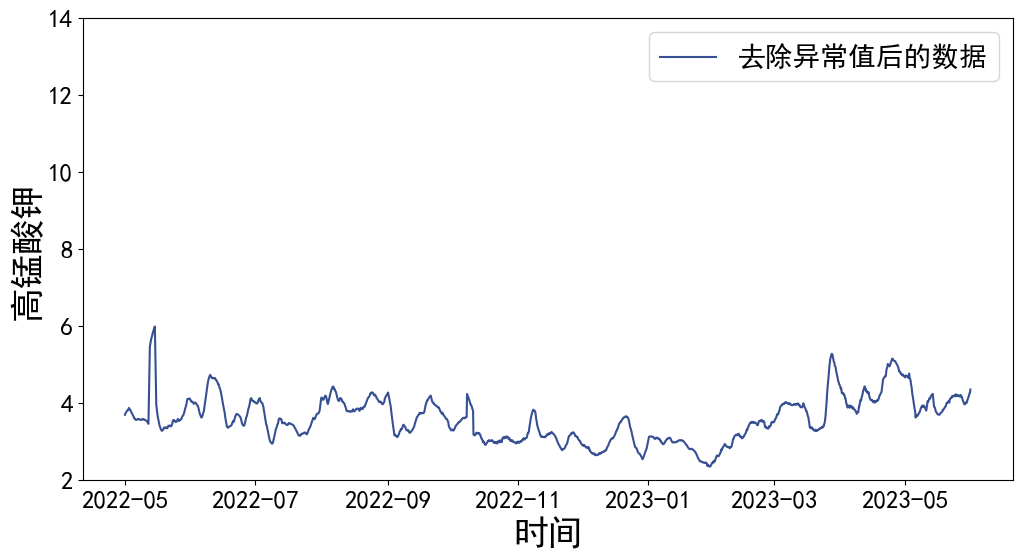

In [104]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
# 设置 x 轴和 y 轴刻度标签的字体大小
plt.tick_params(labelsize=18)
# 将时间转化为matplotlib可识别的格式
#x = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in dong_dgyh['index']]
plt.plot(dong_dgyh['index'], dong_dgyh["高锰酸钾"], color='#375093', label='去除异常值后的数据')
#x = [dong_dgyh['index'][i] for i in result[2]]
#y = [dong_dgyh["高锰酸钾"][i] for i in result[2]]
#plt.scatter(x, y, s=60, color='#831A21', marker='o', label='异常点', alpha=0.8)
#plt.plot(dong_dgyh.index, dong_dgyh["高锰酸钾"].fillna(method='ffill').fillna(method='bfill'), color='green', label='After Fillna')
plt.xlabel('时间',fontsize=25)
plt.ylabel("高锰酸钾",fontsize=25)
# 设置x轴上的日期显示格式
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.ylim([2, 14]) # 设置 y 轴取值范围
plt.legend(loc='upper right',fontsize=20)
filepathy = f'C:\\Users\\qiqi\\Desktop\\create\\可视化\\数据预处理\\修改后_高锰酸钾.png'
plt.savefig(filepathy,dpi=600)
plt.show()